In [1]:
# to avoid warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

#Import Decision Tree Classifier machine learning Library
from sklearn.tree import DecisionTreeClassifier

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn import metrics

# importing ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#importing Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# To calculate accuracy measures and confusion matrix
from sklearn import metrics

# install yellowbrick and graohviz
import graphviz
from yellowbrick.classifier import ClassificationReport, ROCAUC

# loading data sets
data = pd.read_csv("concrete.csv")

#### Univariate analysis <br />
<div style="color:grey;font-size:15px;">Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates (10 Marks) </div>

In [3]:
# check datatype
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [4]:
# get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
# describe the data using statistical summary
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
# getting data shape
data.shape

(1030, 9)

In [7]:
# checking null values
data.isnull().values.any()

False

In [8]:
# get last 5 rows
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [9]:
# get first 5 rows
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [10]:
# Outlier detection 
for col in data.columns:
    Q1=data[col].quantile(q=0.25)
    Q3=data[col].quantile(q=0.75)
    print('1st Quartile (Q1)',col,' is: ', Q1)
    print('3st Quartile (Q3)',col,' is: ', Q3)
    
    IQR = Q3 - Q1  
    print('Interquartile range is', IQR)
    
    # IQR=Q3-Q1
    #lower 1.5*IQR whisker i.e Q1-1.5*IQR
    #upper 1.5*IQR whisker i.e Q3+1.5*IQR
    low_lim = Q1 - 1.5 * IQR 
    up_lim = Q3 + 1.5 * IQR 
    print('low_limit is', low_lim) 
    print('up_limit is', up_lim) 
    
    print('Number of outliers in ',col,' upper : ', data[data[col]>up_lim][col].count())
    print('Number of outliers in ',col,' lower : ', data[data[col]<low_lim][col].count())
    print('% of Outlier in ',col,' upper: ',round(data[data[col]>up_lim][col].count()*100/len(data)), '%')
    print('% of Outlier in ',col,' lower: ',round(data[data[col]<low_lim][col].count()*100/len(data)), '%')
    print('=====================================')

1st Quartile (Q1) cement  is:  192.375
3st Quartile (Q3) cement  is:  350.0
Interquartile range is 157.625
low_limit is -44.0625
up_limit is 586.4375
Number of outliers in  cement  upper :  0
Number of outliers in  cement  lower :  0
% of Outlier in  cement  upper:  0.0 %
% of Outlier in  cement  lower:  0.0 %
1st Quartile (Q1) slag  is:  0.0
3st Quartile (Q3) slag  is:  142.95
Interquartile range is 142.95
low_limit is -214.42499999999998
up_limit is 357.375
Number of outliers in  slag  upper :  2
Number of outliers in  slag  lower :  0
% of Outlier in  slag  upper:  0.0 %
% of Outlier in  slag  lower:  0.0 %
1st Quartile (Q1) ash  is:  0.0
3st Quartile (Q3) ash  is:  118.3
Interquartile range is 118.3
low_limit is -177.45
up_limit is 295.75
Number of outliers in  ash  upper :  0
Number of outliers in  ash  lower :  0
% of Outlier in  ash  upper:  0.0 %
% of Outlier in  ash  lower:  0.0 %
1st Quartile (Q1) water  is:  164.9
3st Quartile (Q3) water  is:  192.0
Interquartile range is 27

In [11]:
# Replacing the two outlier variables with the upper bound:
# % of Outliers in superplastic upper:  1.0 %
# % of Outliers in age   upper:  6.0 %

data['age']= data['age'].replace(data[data['age']>129.5]['age'],129.5)
data['superplastic']= data['superplastic'].replace(data[data['superplastic']>25.5]['superplastic'],25.5)

print('% of Outlier in superplastic upper: ',round(data[data['superplastic']>25.5]['superplastic'].count()*100/len(data)), '%')
print('% of Outlier in superplastic lower: ',round(data[data['superplastic']<-15.3]['superplastic'].count()*100/len(data)), '%')

print('% of Outlier in age upper: ',round(data[data['age']>129.5]['age'].count()*100/len(data)), '%')
print('% of Outlier in age lower: ',round(data[data['age']<-66.5]['age'].count()*100/len(data)), '%')

% of Outlier in superplastic upper:  0.0 %
% of Outlier in superplastic lower:  0.0 %
% of Outlier in age upper:  0.0 %
% of Outlier in age lower:  0.0 %


<strong>Insights</strong>
1. No categorical type variables
2. No missing values found
3. Age variable seems to have outliers
4. No negative values exists in the columns

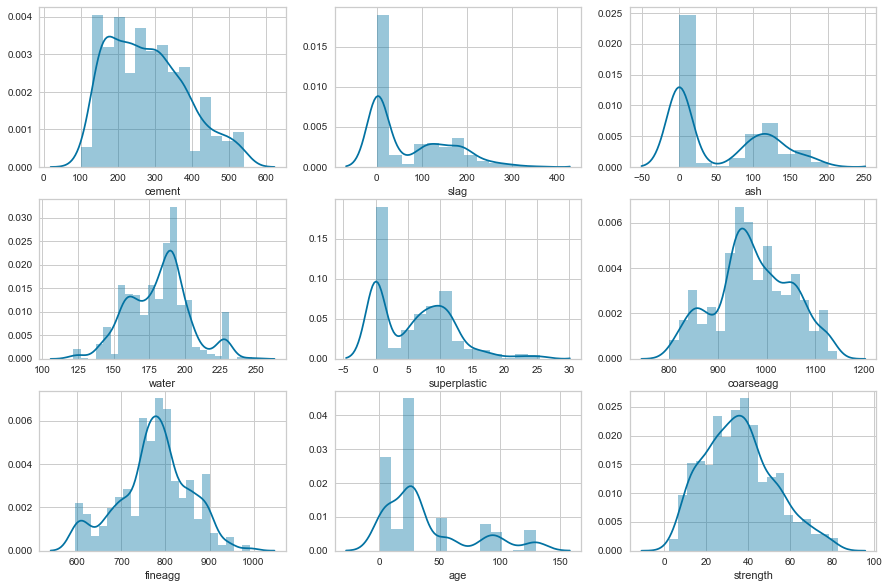

In [12]:
# analysis of the body of distributions/ long tails
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(15,10)

# distplot
for i, column in enumerate(data.columns):
    sns.distplot(data[column],ax=axes[i//3,i%3])

<strong>Insights</strong> <br />
1. Except cement, strength and coarseagg all are skewed <br />
2. Slag has two gausssians and rightly skewed. <br />
3. Ash has two gaussians and rightly skewed. 
4. Water has three guassians and slighly left skewed.
5. Superplastic has two gaussians and rightly skewed.
6. Coarseagg has three guassians and normally distributed.
7. Fineagg has two guassians and looks somewhat normal.
8. Age has multiple guassians and rightly skewed.

In [13]:
# Finding duplicates in the records

duplicate = data[data.duplicated()] 
duplicate.count()

cement          25
slag            25
ash             25
water           25
superplastic    25
coarseagg       25
fineagg         25
age             25
strength        25
dtype: int64

In [14]:
# Removing duplicates

data=data.drop_duplicates()
data.shape

(1005, 9)

### Bi-variate analysis <br />
<div>Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)</div>

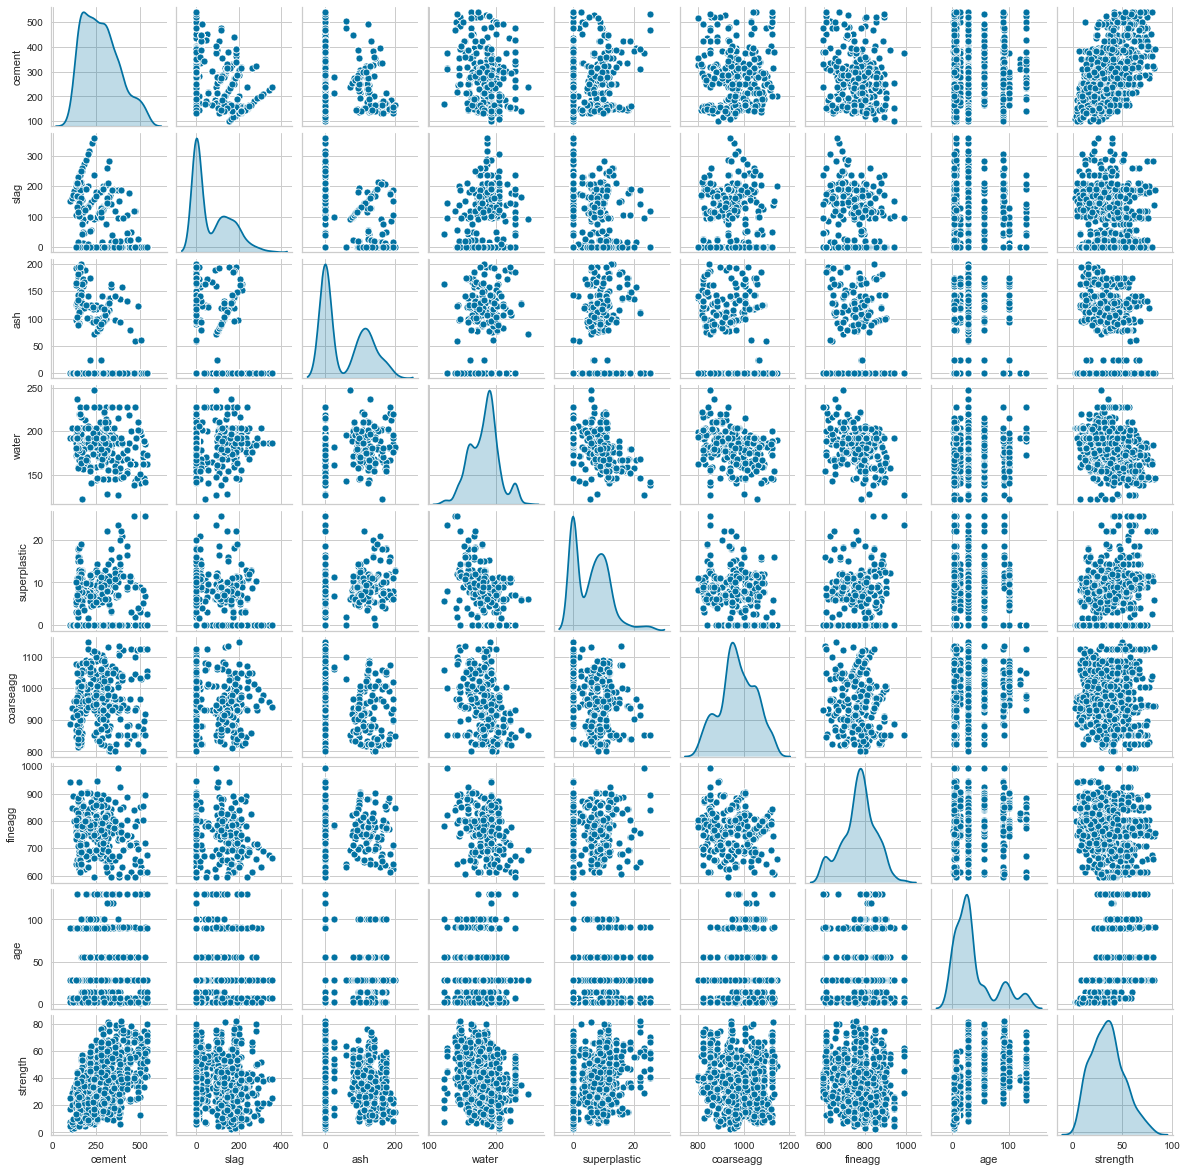

In [15]:
# Drawing SNS pairplot
# sns.pairplot(data, hue='strength' , diag_kind='kde')
d = sns.pairplot(data, diag_kind='kde')
d.fig.set_size_inches(16,16)

### Analysis based on pairplot above

#### Relation amongst independent features

1. Cement: Cement has no linear relation with any of the other independent variables.
2. Slug: Slug has no linear relation with any of the other independent variables.
3. Ash: Ash has has no linear relation with any of the other independent variables.
4. Water: Water seems to have negative linear relation with superplastic, fineagg, courseegg. It does not have any significant linear relation with others.
5. Superplastic: Superplastic seems to have negative linear relation with water and does not have any significant relation with other variables.
6. Coarseagg: This attribute also got no significant relationship with any other attribute.
7. Fineagg: It has negative linear relation with water but does not have any significant relation with any other attribute.
8. Age: Age has no linear relation with any of the other independent variables.

<strong> The chances correlation amongst variables are less so, considering all attributes in our model makes sense. </strong>

#### Relationship between Independent features and target variable (strength)

1. Cement: Cement has strong posivite correlation with strength.
2. Slug: Strength doesn't seem to have any significant relation with slug.
3. Ash: Strength doesn't seem to have any significant relation with ash.
4. Water: Water seems to have weak negative correlation with strength.
5. Superplasticizer: Superplasticizer seems to have posivite correlation with strength..
6. Coarseagg, Fineagg and Age: Doesn't seem to have linear relation.

<strong> Except cement, none of the attributes seems to have a good prediction with the strength for linear model. </strong>

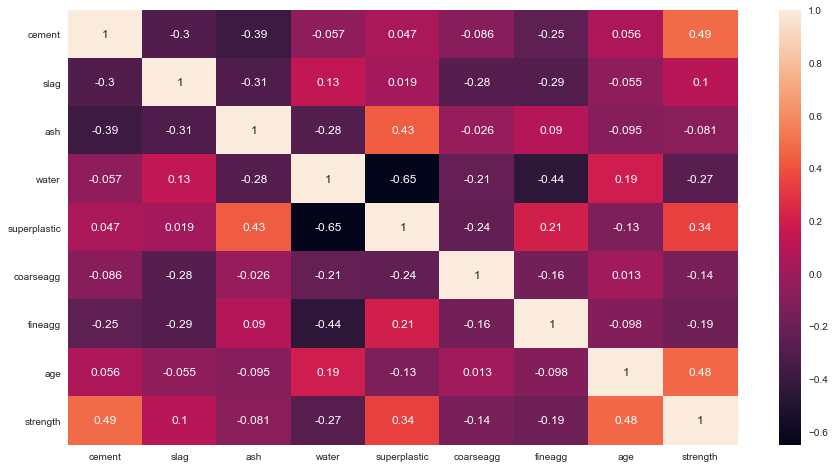

In [16]:
# Drawing Heatmap

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()


# Cement, Age and Superplastic are positively related with the target output
# Water, Coarseagg, Fineagg and Ash are negatively corelated with the target output
# All the variables seems to have correlation with the output variable

Text(0, 0.5, 'Strength Count')

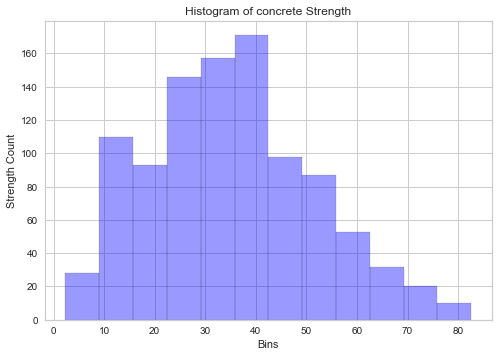

In [17]:
# Checking at the Strength values

sns.distplot(data['strength'], hist=True, kde=False, bins=int(12), color = 'blue', hist_kws={'edgecolor':'black'})
plt.title('Histogram of concrete Strength')
plt.xlabel('Bins')
plt.ylabel('Strength Count')

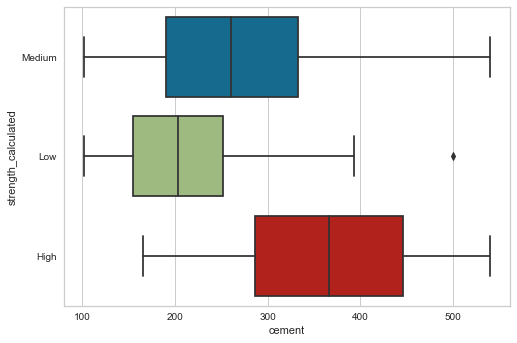

In [18]:
# Looking at the above graph, I can conclude that Strength data is following a binomial pattern and
# I would like to separate the strength into 3 parts for ploting the box plots
# If Strength > 50 => High
# If Strength <= 50 && > 20 => Medium
# If Strength <= 20 => Low


data_new = data.copy(deep=True)
def lab(data2):
    if data2["strength"] <= 20:
        return "Low"
    if data2["strength"] > 20 and data2["strength"] <= 50 :
        return "Medium"
    if data2["strength"] > 50 :
        return "High"
    
data_new["strength_calculated"] = data_new.apply(lambda data_new:lab(data_new) ,axis =1)

sns.boxplot(x="cement", y="strength_calculated", data=data_new)
plt.show()

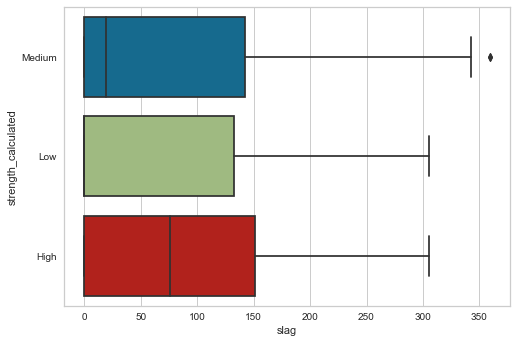

In [19]:
sns.boxplot(x="slag", y="strength_calculated", data=data_new)
plt.show()

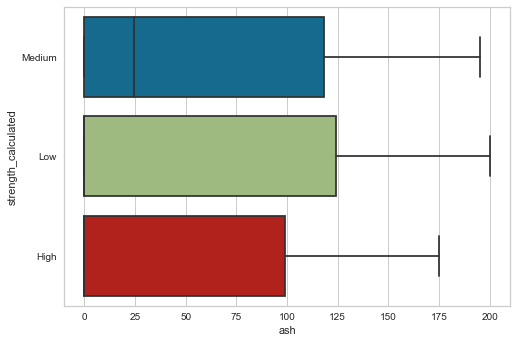

In [20]:
sns.boxplot(x="ash", y="strength_calculated", data=data_new)
plt.show()

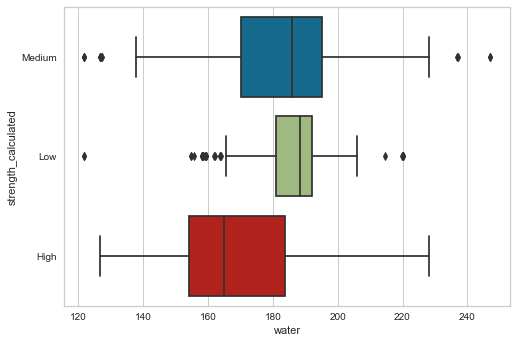

In [21]:
sns.boxplot(x="water", y="strength_calculated", data=data_new)
plt.show()

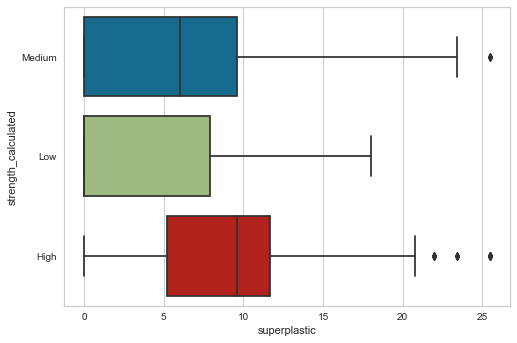

In [22]:
sns.boxplot(x="superplastic", y="strength_calculated", data=data_new)
plt.show()

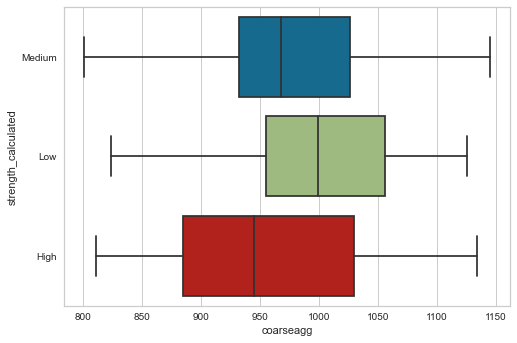

In [23]:
sns.boxplot(x="coarseagg", y="strength_calculated", data=data_new)
plt.show()

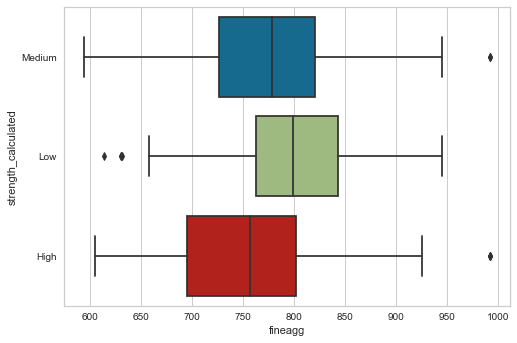

In [24]:
sns.boxplot(x="fineagg", y="strength_calculated", data=data_new)
plt.show()

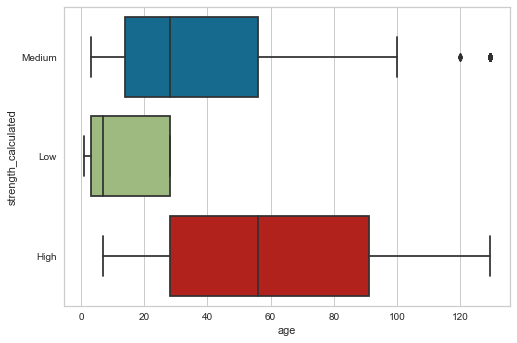

In [25]:
sns.boxplot(x="age", y="strength_calculated", data=data_new)
plt.show()

#### Feature Engineering techniques(10 marks) 
<br />
Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
Get the data model ready and do a train test split.
Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.

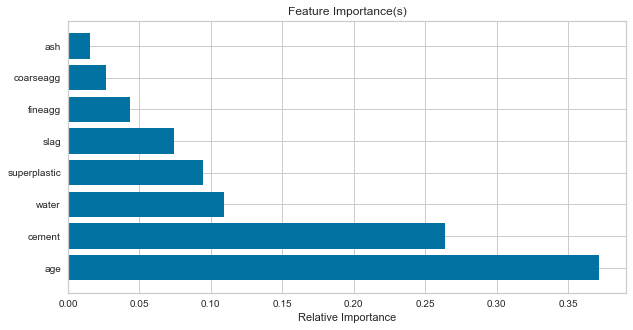

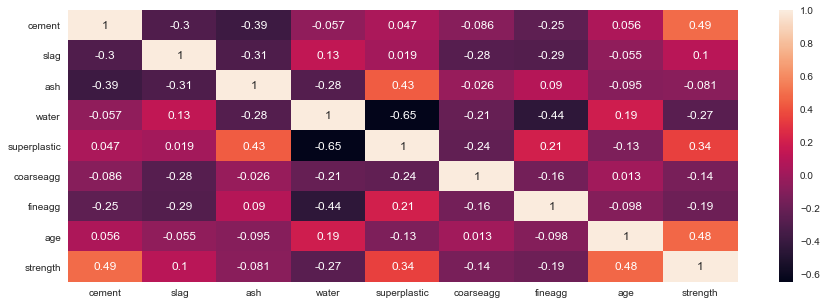

In [60]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = data['strength']
X = data.loc[:, data.columns != 'strength']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Trying to get the feature importance from RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rfm=rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = data.columns[:]
features= a.drop('strength',1)

# Plot it
plt.figure(figsize=(10,5))
plt.title('Feature Importance(s)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# Drawing heatmap for reference
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Insights 
<br />
1. Referring to above charts, none of the features seems to have high correlation. <br />
2. Doesn't feel like combining 2 or more features will make the new feature. <br />
3. Feature - Ash seems to be of least importance. I can try getting rid of it. <br />
4. Will check the model for the accuracy and reduced MSE

In [62]:
# Creating independent and dependent variables
X=data.loc[:,data.columns!='strength']
y=data.loc[:,data.columns=='strength']

# Split X and y into training and test set in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

# Performing normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
# Checking all the models for various techniques

# LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix,mean_squared_error
from sklearn.linear_model import LinearRegression

# Fit the model on train
modellr = LinearRegression()
modellr.fit(x_train, y_train)

# Predict on test
y_predict = modellr.predict(x_test)

model_score = modellr.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

results = pd.DataFrame({'Method':['Linear Regression'], 'Training accuracy': modellr.score(x_train,y_train),
                        'Testing accuracy': modellr.score(x_test, y_test),
                       'MSE': rmse})
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262


In [64]:
# LinearRegression after dropping the field "ash"

# Creating the deep copy of the modified panda dataframe
datanew = data.copy()
datanew = datanew.drop(['ash'], axis=1)
datanew.head()
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [65]:
# LinearRegression after dropping "ash"

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix,mean_squared_error
from sklearn.linear_model import LinearRegression

X=datanew.loc[:,datanew.columns!='strength']
y=datanew.loc[:,datanew.columns=='strength']

# Split X and y into training and test set in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=x_train.columns

# Performing normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Fit the model on train
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on test
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

resultsnew = pd.DataFrame({'Method':['Linear Regression w/o Ash'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263


#### Insights
<br />
MSE score has increased and accuracy decreased after dropping "ash". I have decided not to drop that column.

In [66]:
# Creating independent and dependent variables
X=data.loc[:,data.columns!='strength']
y=data.loc[:,data.columns=='strength']

# Split X and y into training and test set in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

# Performing normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
# LinearRegression with Lasso Regularization
from sklearn import metrics
from sklearn.linear_model import Lasso

# Fit the model on train
model = Lasso(alpha=0.1)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

#Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['Lasso (alpha=0.1)'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856


In [68]:
# LinearRegression with Lasso Regularization
from sklearn import metrics
from sklearn.linear_model import Lasso

# Fit the model on train
model = Lasso(alpha=0.5)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

#Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['Lasso (alpha=0.5)'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384


In [69]:
# LinearRegression with Lasso Regularization
from sklearn import metrics
from sklearn.linear_model import Lasso

# Fit the model on train
model = Lasso(alpha=1.0)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

#Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['Lasso (alpha=1.0)'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326


In [70]:
# LinearRegression with Ridge Regularization

from sklearn import metrics
from sklearn.linear_model import Ridge

# Fit the model on train

model = Ridge(alpha=0.1)
model.fit(x_train, y_train)

# Predict on test
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

#Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['Ridge (alpha=0.1)'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874


In [71]:
# LinearRegression with Ridge Regularization

from sklearn import metrics
from sklearn.linear_model import Ridge

# Fit the model on train

model = Ridge(alpha=0.5)
model.fit(x_train, y_train)

# Predict on test
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

#Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['Ridge (alpha=0.5)'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466


In [72]:
# LinearRegression with Ridge Regularization

from sklearn import metrics
from sklearn.linear_model import Ridge

# Fit the model on train

model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

# Predict on test
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

#Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['Ridge (alpha=1.0)'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009


In [73]:
# PolynomialFeatures with Degree 2

from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Create linear regression object
poly = PolynomialFeatures(degree=2)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train))

model_score = model.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

# Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['PolynomialFeatures (degree=2)'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

0.8663047573695642


,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009
0,PolynomialFeatures (degree=2),0.866305,0.820284,8.711009


#### Insights
<br />
It seems that Polynomial method with degree 2 is giving the best result in terms of testing accuracy and MSE considered together. <br />
Linear regression, Linear regression without variable "Ash", Lasso and Ridge are performing somewhat very similar.

### Creating the Model and Tuning It:
<br />
Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)

In [74]:
# Checking with the default parameters for the models to see which one's are doing good
# After that, I can do hyper-parameter tuning

# DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

modeldtr = DecisionTreeRegressor(min_samples_leaf= 5, max_depth= 5, criterion= 'mse',random_state=0)
modeldtr.fit(x_train, y_train)

# Predict on test
y_predict = modeldtr.predict(x_test)

model_score = modeldtr.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

# Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['DecisionTreeRegressor'], 'Training accuracy': modeldtr.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009
0,PolynomialFeatures (degree=2),0.866305,0.820284,8.711009
0,DecisionTreeRegressor,0.803364,0.713894,8.533777


In [75]:
# Using k-fold for 10 folds
kf = KFold(n_splits = 10, shuffle = True)

scores = []
for i in range(10):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = modeldtr.fit(x_train,y_train)
    predictions = model.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('=================================================================================')
print(results)
print('=================================================================================')
print('Average K-Fold Score :' , np.mean(scores))
print('=================================================================================')
print("Minimum is " + str(min(scores)) + " & Maximum is " + str(max(scores)))
print('=================================================================================')

Scores from each Iteration:  [0.8047151123835508, 0.6957875480391003, 0.609195064506387, 0.7640015552920352, 0.64599344650422, 0.7319799713827515, 0.7532900594334266, 0.7883020642870164, 0.7987560995697461, 0.7321437519335048]
                          Method  Training accuracy  Testing accuracy  \
0              Linear Regression           0.723869          0.701664   
0      Linear Regression w/o Ash           0.709832          0.687041   
0              Lasso (alpha=0.1)           0.722790          0.702171   
0              Lasso (alpha=0.5)           0.711133          0.689902   
0              Lasso (alpha=1.0)           0.679513          0.655787   
0              Ridge (alpha=0.1)           0.723868          0.701690   
0              Ridge (alpha=0.5)           0.723861          0.701787   
0              Ridge (alpha=1.0)           0.723841          0.701886   
0  PolynomialFeatures (degree=2)           0.866305          0.820284   
0          DecisionTreeRegressor           

##### K-fold Accuracies are in the range [61% to 80%] which seems wide.

In [76]:
# Using Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
modelrf = RandomForestRegressor(random_state=0)

modelrf.fit(x_train, y_train)

# Predict on test
y_predict = modelrf.predict(x_test)

model_score = modelrf.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

# Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['RandomForestRegressor'], 'Training accuracy': modelrf.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009
0,PolynomialFeatures (degree=2),0.866305,0.820284,8.711009
0,DecisionTreeRegressor,0.803364,0.713894,8.533777


In [77]:
# Using k-fold for 10 folds
kf = KFold(n_splits = 10, shuffle = True)

scores = []
for i in range(10):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = modelrf.fit(x_train,y_train)
    predictions = model.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('=================================================================================')
print(results)
print('=================================================================================')
print('Average K-Fold Score :' , np.mean(scores))
print('=================================================================================')
print("Minimum is " + str(min(scores)) + " & Maximum is " + str(max(scores)))
print('=================================================================================')

Scores from each Iteration:  [0.9084688041809965, 0.9241969643538908, 0.9413605675676312, 0.9036211621226917, 0.8879630350964199, 0.892953515517812, 0.9294728942112901, 0.8891532411431771, 0.9194191964240332, 0.9387630010316024]
                          Method  Training accuracy  Testing accuracy  \
0              Linear Regression           0.723869          0.701664   
0      Linear Regression w/o Ash           0.709832          0.687041   
0              Lasso (alpha=0.1)           0.722790          0.702171   
0              Lasso (alpha=0.5)           0.711133          0.689902   
0              Lasso (alpha=1.0)           0.679513          0.655787   
0              Ridge (alpha=0.1)           0.723868          0.701690   
0              Ridge (alpha=0.5)           0.723861          0.701787   
0              Ridge (alpha=1.0)           0.723841          0.701886   
0  PolynomialFeatures (degree=2)           0.866305          0.820284   
0          DecisionTreeRegressor         

##### K-fold Accuracies are in the range [89% to 94%] which is much better than decision tree.

In [78]:
# Using Bagging Regressor

from sklearn.ensemble import BaggingRegressor
modelbr = BaggingRegressor(random_state=0)

modelbr.fit(x_train, y_train)

# Predict on test
y_predict = modelbr.predict(x_test)

model_score = modelbr.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

# Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['BaggingRegressor'], 'Training accuracy': modelbr.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009
0,PolynomialFeatures (degree=2),0.866305,0.820284,8.711009
0,DecisionTreeRegressor,0.803364,0.713894,8.533777


In [79]:
# Using k-fold for 10 folds
kf = KFold(n_splits = 10, shuffle = True)

scores = []
for i in range(10):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = modelbr.fit(x_train,y_train)
    predictions = model.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('=================================================================================')
print(results)
print('=================================================================================')
print('Average K-Fold Score :' , np.mean(scores))
print('=================================================================================')
print("Minimum is " + str(min(scores)) + " & Maximum is " + str(max(scores)))
print('=================================================================================')

Scores from each Iteration:  [0.8623598913324348, 0.8530950239519756, 0.9257777980484854, 0.9003322596569606, 0.8802092682938354, 0.9304145768623268, 0.9024759029649199, 0.9122019803101973, 0.9207885654760791, 0.8519333834970835]
                          Method  Training accuracy  Testing accuracy  \
0              Linear Regression           0.723869          0.701664   
0      Linear Regression w/o Ash           0.709832          0.687041   
0              Lasso (alpha=0.1)           0.722790          0.702171   
0              Lasso (alpha=0.5)           0.711133          0.689902   
0              Lasso (alpha=1.0)           0.679513          0.655787   
0              Ridge (alpha=0.1)           0.723868          0.701690   
0              Ridge (alpha=0.5)           0.723861          0.701787   
0              Ridge (alpha=1.0)           0.723841          0.701886   
0  PolynomialFeatures (degree=2)           0.866305          0.820284   
0          DecisionTreeRegressor        

##### K-fold Accuracies are in the range [85% to 93%] which is better too.

In [80]:
# Using Ada-Boost Regressor

from sklearn.ensemble import AdaBoostRegressor
modelabr = AdaBoostRegressor(random_state=0)

modelabr.fit(x_train, y_train)

# predict on test
y_predict = modelabr.predict(x_test)

model_score = modelabr.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

# Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['AdaBoostRegressor'], 'Training accuracy': modelabr.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009
0,PolynomialFeatures (degree=2),0.866305,0.820284,8.711009
0,DecisionTreeRegressor,0.803364,0.713894,8.533777


In [81]:
# Using k-fold for 10 folds
kf = KFold(n_splits = 10, shuffle = True)

scores = []
for i in range(10):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = modelabr.fit(x_train,y_train)
    predictions = model.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('=================================================================================')
print(results)
print('=================================================================================')
print('Average K-Fold Score :' , np.mean(scores))
print('=================================================================================')
print("Minimum is " + str(min(scores)) + " & Maximum is " + str(max(scores)))
print('=================================================================================')

Scores from each Iteration:  [0.7790086829624556, 0.7699155211606528, 0.7599529123440038, 0.8163125007718737, 0.7954180463987927, 0.7182121679728073, 0.765783307748986, 0.7870762703202283, 0.7693437949923956, 0.7367163470912161]
                          Method  Training accuracy  Testing accuracy  \
0              Linear Regression           0.723869          0.701664   
0      Linear Regression w/o Ash           0.709832          0.687041   
0              Lasso (alpha=0.1)           0.722790          0.702171   
0              Lasso (alpha=0.5)           0.711133          0.689902   
0              Lasso (alpha=1.0)           0.679513          0.655787   
0              Ridge (alpha=0.1)           0.723868          0.701690   
0              Ridge (alpha=0.5)           0.723861          0.701787   
0              Ridge (alpha=1.0)           0.723841          0.701886   
0  PolynomialFeatures (degree=2)           0.866305          0.820284   
0          DecisionTreeRegressor         

##### K-fold Accuracies are in the range [72% to 82%] which are not that good.

In [82]:
# Using Gradient Boost

from sklearn.ensemble import GradientBoostingRegressor
modelgb = GradientBoostingRegressor(random_state=0)

modelgb.fit(x_train, y_train)

# Predict on test
y_predict = modelgb.predict(x_test)

model_score = modelgb.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

# Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['GradientBoostRegressor'], 'Training accuracy': modelgb.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009
0,PolynomialFeatures (degree=2),0.866305,0.820284,8.711009
0,DecisionTreeRegressor,0.803364,0.713894,8.533777


In [83]:
# Using k-fold for 10 folds
kf = KFold(n_splits = 10, shuffle = True)

scores = []
for i in range(10):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = modelgb.fit(x_train,y_train)
    predictions = model.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('=================================================================================')
print(results)
print('=================================================================================')
print('Average K-Fold Score :' , np.mean(scores))
print('=================================================================================')
print("Minimum is " + str(min(scores)) + " & Maximum is " + str(max(scores)))
print('=================================================================================')

Scores from each Iteration:  [0.9009439282126837, 0.9298030280740124, 0.8914768050245053, 0.904458986003778, 0.8792568353077944, 0.909509712737712, 0.9311333338916206, 0.9106483492436636, 0.9096259718524922, 0.887834286188469]
                          Method  Training accuracy  Testing accuracy  \
0              Linear Regression           0.723869          0.701664   
0      Linear Regression w/o Ash           0.709832          0.687041   
0              Lasso (alpha=0.1)           0.722790          0.702171   
0              Lasso (alpha=0.5)           0.711133          0.689902   
0              Lasso (alpha=1.0)           0.679513          0.655787   
0              Ridge (alpha=0.1)           0.723868          0.701690   
0              Ridge (alpha=0.5)           0.723861          0.701787   
0              Ridge (alpha=1.0)           0.723841          0.701886   
0  PolynomialFeatures (degree=2)           0.866305          0.820284   
0          DecisionTreeRegressor           

##### K-fold Accuracies are in the range [88% to 93%] which is awesome.

In [84]:
# Using XGBoost

import xgboost as xgb
modelxgb = xgb.XGBRegressor()

modelxgb.fit(x_train, y_train)
# Predict on test
y_predict = modelxgb.predict(x_test)

model_score = modelxgb.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

# Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['XGBoostRegressor'], 'Training accuracy': modelxgb.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009
0,PolynomialFeatures (degree=2),0.866305,0.820284,8.711009
0,DecisionTreeRegressor,0.803364,0.713894,8.533777


In [85]:
# Using k-fold for 10 folds
kf = KFold(n_splits = 10, shuffle = True)

scores = []
for i in range(10):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = modelxgb.fit(x_train,y_train)
    predictions = model.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('=================================================================================')
print(results)
print('=================================================================================')
print('Average K-Fold Score :' , np.mean(scores))
print('=================================================================================')
print("Minimum is " + str(min(scores)) + " & Maximum is " + str(max(scores)))
print('=================================================================================')

Scores from each Iteration:  [0.9171062389306217, 0.9255293024129971, 0.9101831547165568, 0.9517182658098694, 0.914035662162207, 0.9670536451290882, 0.9273445221550519, 0.8968220005112097, 0.8925528384351824, 0.9465509633266569]
                          Method  Training accuracy  Testing accuracy  \
0              Linear Regression           0.723869          0.701664   
0      Linear Regression w/o Ash           0.709832          0.687041   
0              Lasso (alpha=0.1)           0.722790          0.702171   
0              Lasso (alpha=0.5)           0.711133          0.689902   
0              Lasso (alpha=1.0)           0.679513          0.655787   
0              Ridge (alpha=0.1)           0.723868          0.701690   
0              Ridge (alpha=0.5)           0.723861          0.701787   
0              Ridge (alpha=1.0)           0.723841          0.701886   
0  PolynomialFeatures (degree=2)           0.866305          0.820284   
0          DecisionTreeRegressor         

##### K-fold Accuracies are in the range [89% to 97%] which is awesome again.

### I would recommend below algorithms for this model
<br />
1. XG Boost <br />
2. Gradient <br />
3. Random Forest and then <br />
4. Bagging

## Creating the Model and Tuning It:
<br />
Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [87]:
# I am checking on Decision tree to see how much can be improved

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor(random_state = 42)  
param_grid = {"criterion": ["mse"],
              "min_samples_split": [3 ,5, 10, 20, 40],
              "max_depth": [6, 8, 10, 12, 15],
              "min_samples_leaf": [2, 4, 20, 40],
              "max_leaf_nodes": [20, 100, 200, 400],
              }

grid_cv_dtm = GridSearchCV(estimator = dtr, param_grid = param_grid, cv=5)

grid_cv_dtm.fit(x_train, y_train)

# We can view the best parameters from fitting the decision tree:
print('Best Parameters are:')
print(grid_cv_dtm.best_params_)
print(grid_cv_dtm.score(x_train,y_train))

print('Best estimators are:')
print(grid_cv_dtm.best_estimator_)

Best Parameters are:
{'criterion': 'mse', 'max_depth': 12, 'max_leaf_nodes': 200, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.9726041474943129
Best estimators are:
DecisionTreeRegressor(max_depth=12, max_leaf_nodes=200, min_samples_leaf=2,
                      min_samples_split=5, random_state=42)


In [88]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))
dt_new = DecisionTreeRegressor(max_depth=12, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5,random_state = 42).fit(x_train, y_train) 

# Predict on test
y_predict = dt_new.predict(x_test)

model_score = dt_new.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

# Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['Decision Tree Grid Search CV'], 'Training accuracy': dt_new.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

R-Squared::0.786688422976557
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 12, 'max_leaf_nodes': 200, 'min_samples_leaf': 2, 'min_samples_split': 5}


,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009
0,PolynomialFeatures (degree=2),0.866305,0.820284,8.711009
0,DecisionTreeRegressor,0.803364,0.713894,8.533777


In [89]:
# Checking on gradient boost now

gbr = GradientBoostingRegressor(random_state=0)

param_grid = {"n_estimators":[50, 70, 100], 'learning_rate':[0.1, 0.2, 0.4]}
grid_cv_gbr = GridSearchCV(gbr, param_grid, cv=5)
grid_cv_gbr.fit(x_train, y_train)

# We can view the best parameters from fitting the gradient boost:
print('Best Parameters are:')
print(grid_cv_gbr.best_params_)
print(grid_cv_gbr.score(x_train,y_train))

print('Best estimators are:')
print(grid_cv_gbr.best_estimator_)

Best Parameters are:
{'learning_rate': 0.4, 'n_estimators': 70}
0.970061101451711
Best estimators are:
GradientBoostingRegressor(learning_rate=0.4, n_estimators=70, random_state=0)


In [90]:
print("R-Squared::{}".format(grid_cv_gbr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_gbr.best_params_))
dt_new = GradientBoostingRegressor(learning_rate=0.4, n_estimators= 70, random_state=0).fit(x_train, y_train) 

# Predict on test
y_predict = dt_new.predict(x_test)

model_score = dt_new.score(x_test, y_test)
rmse= np.sqrt(mean_squared_error(y_test,y_predict))

# Store the accuracy results for each model in a dataframe for final comparison
resultsnew = pd.DataFrame({'Method':['Gradient Boosting Grid Search CV'], 'Training accuracy': dt_new.score(x_train,y_train),
                        'Testing accuracy': model_score, 'MSE': rmse})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','MSE']]
results = results.drop_duplicates()
results

R-Squared::0.9022259223534135
Best Hyperparameters::
{'learning_rate': 0.4, 'n_estimators': 70}


,Method,Training accuracy,Testing accuracy,MSE
0,Linear Regression,0.723869,0.701664,8.714262
0,Linear Regression w/o Ash,0.709832,0.687041,8.925263
0,Lasso (alpha=0.1),0.722790,0.702171,8.706856
0,Lasso (alpha=0.5),0.711133,0.689902,8.884384
0,Lasso (alpha=1.0),0.679513,0.655787,9.360326
0,Ridge (alpha=0.1),0.723868,0.701690,8.713874
0,Ridge (alpha=0.5),0.723861,0.701787,8.712466
0,Ridge (alpha=1.0),0.723841,0.701886,8.711009
0,PolynomialFeatures (degree=2),0.866305,0.820284,8.711009
0,DecisionTreeRegressor,0.803364,0.713894,8.533777


#### To conclude, regressors are showing good improvement in testing accuracy and decrease in MSE post hyperparameter tuning.  Spending time with hyperparameter tuning to get improved performance in the model should be a must activity.